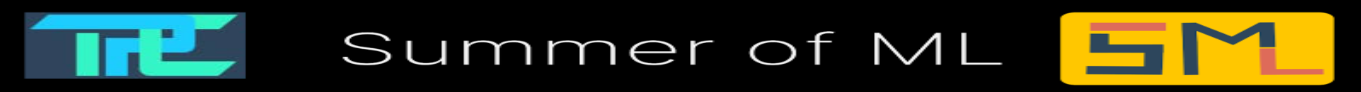

# Summer of Machine Learning (SoM) Project

### *About the project & Dataset*


About the project :-
This is a ML Project named "KharchaKitna" which will predict the Monthlty Expense of a student (specially of our IIITDMJ Campus)
The dataset for this model is intutively prepared by myself by taking expenses ideas for fellow batchmates.
It takes account of various factors(mention as columns of CSV File) like:-
1. **MessTaken** :- Opted for Mess or Not.(1 means opted ✅ / 0 means not opted ❌)

 ***NOTE*** :- If you have opted for mess then your monthly mess amount will be not included with the MonthlyExpense, since it is already paid at the start of the Semester.

2. **CanteenVisit** :- No. of days you visit canteen/Hexa/Nescafe(all included) per week.

3. **RelationshipStatus** :- whether the student is single🗿 or mingle😁.(0 means single / 1 means mingle)

4. **OnlineFood** :- No. of times the student order food online from city.(per month)

5. **CityVisit** :- No. of times the student visit the city from campus.(per month)

**MonthlyExpense** which is our last column is out target column.

This will include :-
*   Recharge
*   Basic Needs(Groceries)
*   Outside Food (Hexa/Canteen/Nescafe)
*   The used feature column,etc.








### EDA of the Dataset


Importing Necessary Libaries


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading the CSV file i.e. Dataset

In [33]:

df = pd.read_csv("https://drive.google.com/uc?export=download&id=1nNLb0JjZ6n7NvmVz4xytk1t6LZUnZS0i")


In [34]:
df.head()

,MessTaken,CanteenVisit,RelationshipStatus,OnlineFood,CityVisit,MonthlyExpense
0,1,4,0,0,2,1400
1,1,3,1,2,3,2075
2,1,4,0,1,1,1350
3,1,5,1,1,2,2225
4,1,7,1,3,3,6799


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   MessTaken           200 non-null    int64
 1   CanteenVisit        200 non-null    int64
 2   RelationshipStatus  200 non-null    int64
 3   OnlineFood          200 non-null    int64
 4   CityVisit           200 non-null    int64
 5   MonthlyExpense      200 non-null    int64
dtypes: int64(6)
memory usage: 9.5 KB
None


Drawing the Correlation matrix heatmap graph to see the interrelation between the Columns of the dataset.


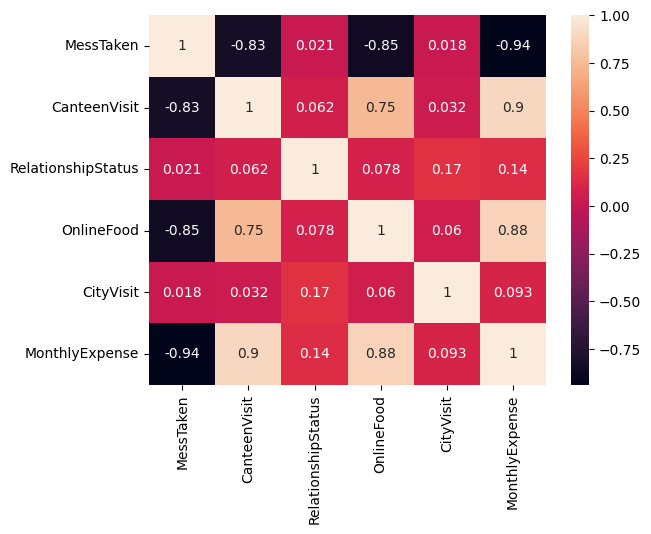

In [36]:
corr = df.corr()
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

The following observation we can draw form the heatmap that :-

*   Mess and CanteenVisit and OnlineFood are neagtively related with Mess, we can understand from this that if a student has opted for the mess then he is less likely to visit canteen and order online food.
*   Mess is very significantly related to MonthlyExpens, the relation is negative ssince if you opt for mess the your monthly expense will be less.



## Building Models to Predict the Monthly Expenses

### 1. By using Linear Regression Model

In [37]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

# 'MonthlyExpense' is the target variable and the rest are features
X = df.drop('MonthlyExpense', axis=1)
y = df['MonthlyExpense']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Linear Regression model
model = LinearRegression()

# K-fold cross-validation to split the data set in folds for better prediction
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
r2_scores = []

for train_index, val_index in kf.split(X_train):
  X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
  y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

  model.fit(X_train_fold, y_train_fold)
  y_pred_fold = model.predict(X_val_fold)

  rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))
  r2_scores.append(r2_score(y_val_fold, y_pred_fold))

# Print average RMSE and R-squared across folds
print("Average RMSE:", np.mean(rmse_scores))
print("Average R-squared:", np.mean(r2_scores))

# Train the final model on the entire training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R-squared:", r2)
score = model.score(X_test, y_test)
print("Model Score:", score)

Average RMSE: 451.67253397105344
Average R-squared: 0.942944161927804
Test RMSE: 561.4112130796628
Test R-squared: 0.9370427575330874
Model Score: 0.9370427575330874


Linear Regression model score : **0.937**

Testing our model on Custom dataset.

In [38]:
# Sample new data (replace with your actual data)
new_data = pd.DataFrame({
    'MessTaken': [1],
    'CanteenVisit': [4],
    'RelationshipStatus': [0],
    'OnlineFood': [2],
    'CityVisit': [2]
})

# Make predictions on the new data
predictions = model.predict(new_data)

# Print the predictions
for i, prediction in enumerate(predictions):
    print(f"Prediction for data point : {prediction:.2f}")


Prediction for data point : 1835.48


which is giving promissing results, hence there is not Overfitting Concerns, so we will not apply Regularization techniques (like Lasso or Ridge regression).

### 2. Using Random Forest Algorithm for prediction.

In [39]:
#Using random forest predict the MonthlyExpense
import numpy as np
from sklearn.ensemble import RandomForestRegressor
# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
# K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []
r2_scores = []

for train_index, val_index in kf.split(X_train):
  X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
  y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

  rf_model.fit(X_train_fold, y_train_fold)
  y_pred_fold = rf_model.predict(X_val_fold)

  rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))
  r2_scores.append(r2_score(y_val_fold, y_pred_fold))

# Print average RMSE and R-squared across folds
print("Average RMSE:", np.mean(rmse_scores))
print("Average R-squared:", np.mean(r2_scores))

# Train the final model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model on the test set
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Test RMSE (Random Forest):", rmse_rf)
print("Test R-squared (Random Forest):", r2_rf)
score = rf_model.score(X_test, y_test)
print("Random Forest Model Score:", score)

Average RMSE: 390.80448074416097
Average R-squared: 0.9539342285421399
Test RMSE (Random Forest): 317.31254028069566
Test R-squared (Random Forest): 0.9798878729294391
Random Forest Model Score: 0.9798878729294391


Random Forest Model Score: **0.98**

In [40]:
# Sample new data (replace with your actual data)
new_data = pd.DataFrame({
    'MessTaken': [1],
    'CanteenVisit': [4],
    'RelationshipStatus': [0],
    'OnlineFood': [2],
    'CityVisit': [2]
})

# Make predictions on the new data using the Random Forest model
predictions_rf = rf_model.predict(new_data)

# Print the predictions
for i, prediction in enumerate(predictions_rf):
    print(f"Prediction for data point {i+1} (Random Forest): {prediction:.2f}")


Prediction for data point 1 (Random Forest): 1575.25


## Model Selection


While random forests often providing higher accuracy, **I'm selecting a linear regression model**, which can be justified by the following factor with their explaination.
1. **Interpretability** :-
*Linear Regression*: The coefficients in a linear regression model directly indicate the relationship between each feature and the target variable. This makes it easy to understand how each factor (like CanteenVisit, RelationshipStatus, etc.) impacts the monthly expenses.

*Random Forest*: While random forests can provide feature importance, they do not offer the same level of interpretability as linear regression.
2. **Simplicity** **and** **Transparency** :-
*Linear Regression*: Simple to implement and understand. It provides a clear mathematical relationship that is easy to explain to non-technical users.

*Random Forest*: More complex with multiple decision trees, making the model harder to understand and explain.

3.  **Data Size Considerations** :-

*Linear Regression*: Performs well with smaller datasets. With only 200 students in your dataset, a simpler model like linear regression might generalize better.

*Random Forest*: Typically requires larger datasets to perform optimally and to avoid overfitting.
4. **Prediction Consistency**:-
*Linear Regression*: Provides consistent predictions. Small changes in the input data do not significantly alter the model.

*Random Forest*: Small changes in the data can result in different trees being built, potentially leading to varied predictions.
5. **Ease of Maintenance**:-
*Linear Regression*: Easier to maintain and update with new data. Changes to the model can be easily tracked and managed.

*Random Forest*: Requires more effort to update and maintain, especially if hyperparameter tuning or retraining is needed frequently.
6. **Theoretical Alignment**
*Linear Regression*: If you have domain knowledge suggesting a linear relationship between the features and the target, linear regression is theoretically appropriate.

*Random Fores*t: While flexible and powerful, it may model non-linear relationships that do not exist, leading to overfitting.








Here this NoteBook Ends

Thankyou for taking a look at this Notebook.

*Made in love with SoM'24 by Sumit Chouhan*

---




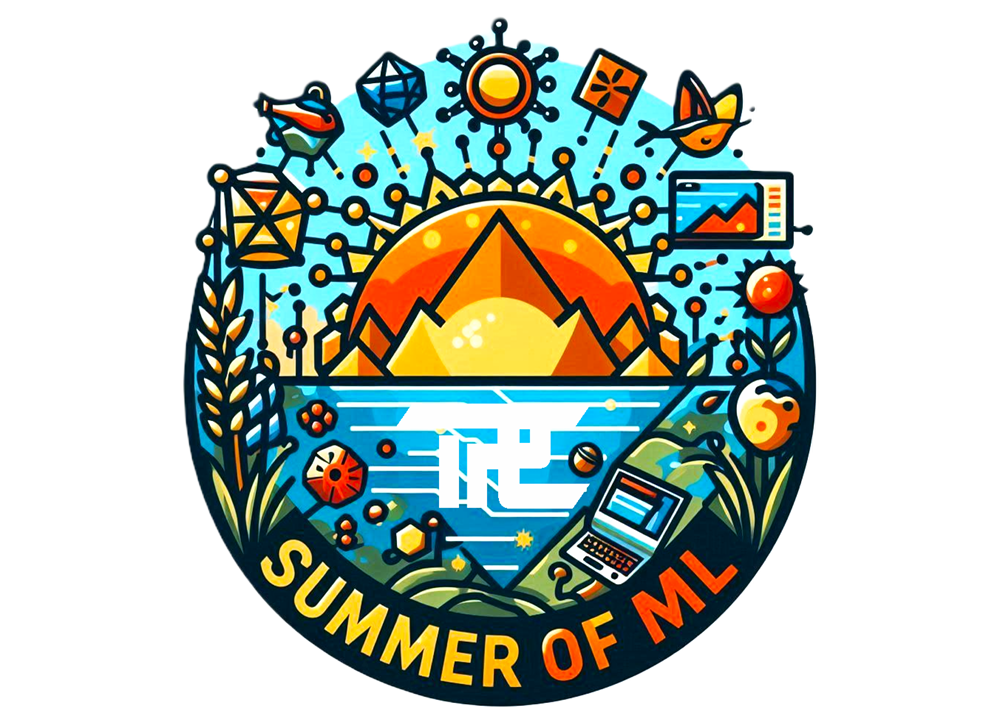

### Saving the trained model

In [41]:
import pickle

In [42]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [43]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav','rb'))
